<a href="https://colab.research.google.com/github/Vite-Noiz/Machine-Learning-Course/blob/main/My%20HW/MiniP3/MiniP3_Q2_1_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install & import require library

In [ ]:
!pip install matplotlib numpy tensorflow
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.spatial.distance import pdist, squareform
from tensorflow.keras.datasets import fashion_mnist

# 1.2, A

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


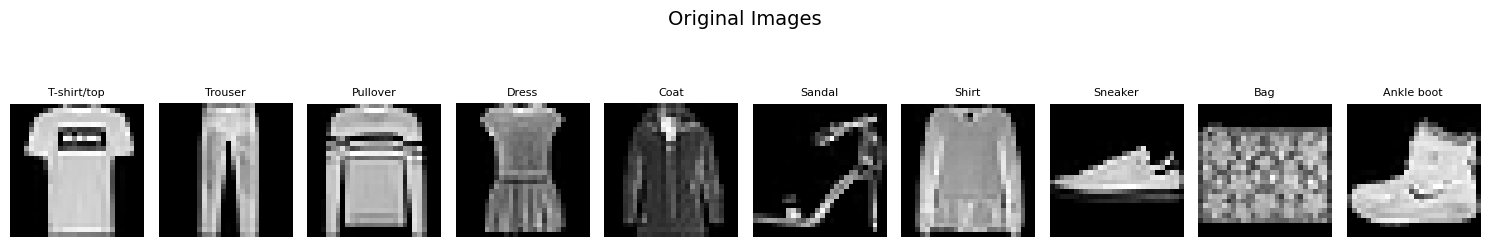

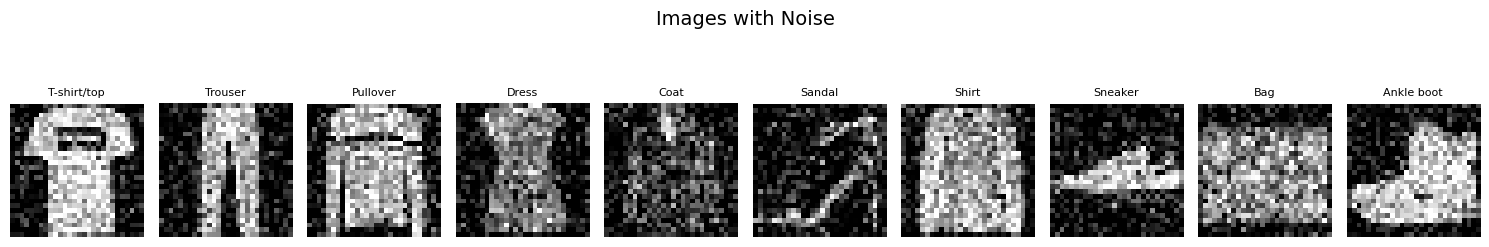

In [ ]:
(train_images, train_labels), (_, _) = fashion_mnist.load_data()

# Normalization [0,1]
train_images = train_images.astype('float32') / 255.0

# choise 1 pic from each class
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

selected_images = []
for class_id in range(10):

    idx = np.where(train_labels == class_id)[0][0] # first pic of class
    selected_images.append(train_images[idx])

# show original pic
plt.figure(figsize=(15, 3))
plt.suptitle('Original Images', fontsize=14, fontfamily='DejaVu Sans')
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(selected_images[i], cmap='gray')
    plt.title(class_names[i], fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()

# add guassian noise
noisy_images = []
for img in selected_images:
    noise = np.random.normal(0, 0.2, img.shape)
    noisy_img = img + noise
    # [0,1]
    noisy_img = np.clip(noisy_img, 0, 1)
    noisy_images.append(noisy_img)

# show noise pic
plt.figure(figsize=(15, 3))
plt.suptitle('Images with Noise', fontsize=14, fontfamily='DejaVu Sans')
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(noisy_images[i], cmap='gray')
    plt.title(class_names[i], fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()

# 1.2, B (implement PCA)

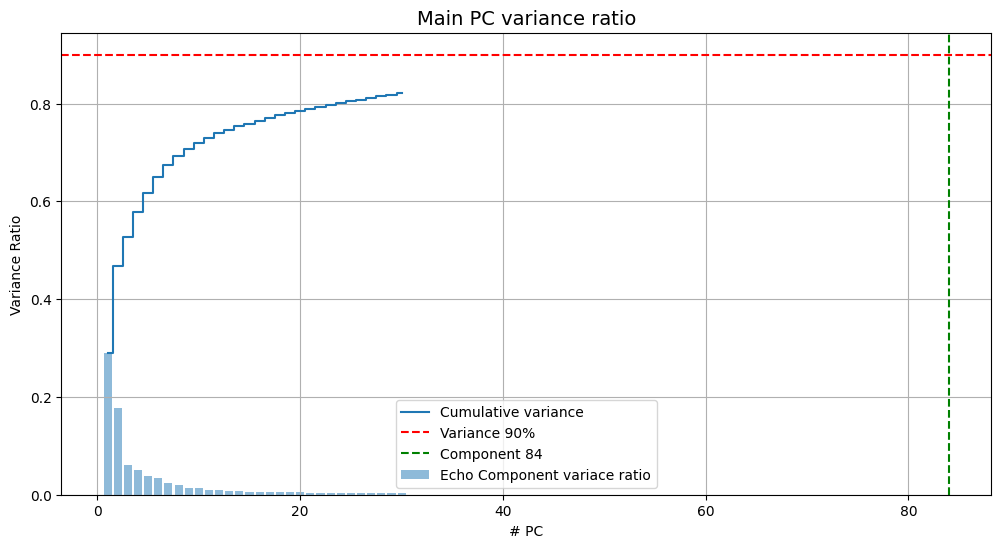

# of components required for 90% variance: 84
# of components required for 95% variance: 187
# of components required for 99% variance: 459


In [ ]:
(train_images, train_labels), (_, _) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255.0

X = train_images.reshape(train_images.shape[0], -1)

def manual_pca(X, n_components=None):
    # 1. make zero mean
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean

    # 2. calc covariance matrix
    cov_matrix = np.cov(X_centered, rowvar=False)

    # 3. eignvalue and vector decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # 4. sorting eignvalue
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors_sorted = eigenvectors[:, sorted_indices]
    eigenvalues_sorted = eigenvalues[sorted_indices]

    # 5. choise main component
    if n_components is not None:
        eigenvectors_sorted = eigenvectors_sorted[:, :n_components]

    # 6. transform data to main component
    X_pca = np.dot(X_centered, eigenvectors_sorted)

    return X_pca, eigenvectors_sorted, eigenvalues_sorted, X_mean

# implement PCA
_, _, eigenvalues, _ = manual_pca(X)

# covariance ratio
total_variance = np.sum(eigenvalues)
variance_ratio = eigenvalues / total_variance
cumulative_variance = np.cumsum(variance_ratio)

# component for 90% ratio
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

# plot
plt.figure(figsize=(12, 6))
plt.bar(range(1, 31), variance_ratio[:30], alpha=0.5, align='center', label='Echo Component variace ratio')
plt.step(range(1, 31), cumulative_variance[:30], where='mid', label='Cumulative variance')
plt.axhline(y=0.90, color='r', linestyle='--', label='Variance 90%')
plt.axvline(x=n_components_90, color='g', linestyle='--', label=f'Component {n_components_90}')

plt.xlabel('# PC', fontfamily='DejaVu Sans')
plt.ylabel('Variance Ratio', fontfamily='DejaVu Sans')
plt.title('Main PC variance ratio', fontsize=14, fontfamily='DejaVu Sans')
plt.legend(loc='best', prop={'family': 'DejaVu Sans'})
plt.grid(True)
plt.show()

print(f"# of components required for 90% variance: {n_components_90}")
print(f"# of components required for 95% variance: {np.argmax(cumulative_variance >= 0.95) + 1}")
print(f"# of components required for 99% variance: {np.argmax(cumulative_variance >= 0.99) + 1}")

# 1.2, C (PCA with scikit-learn)

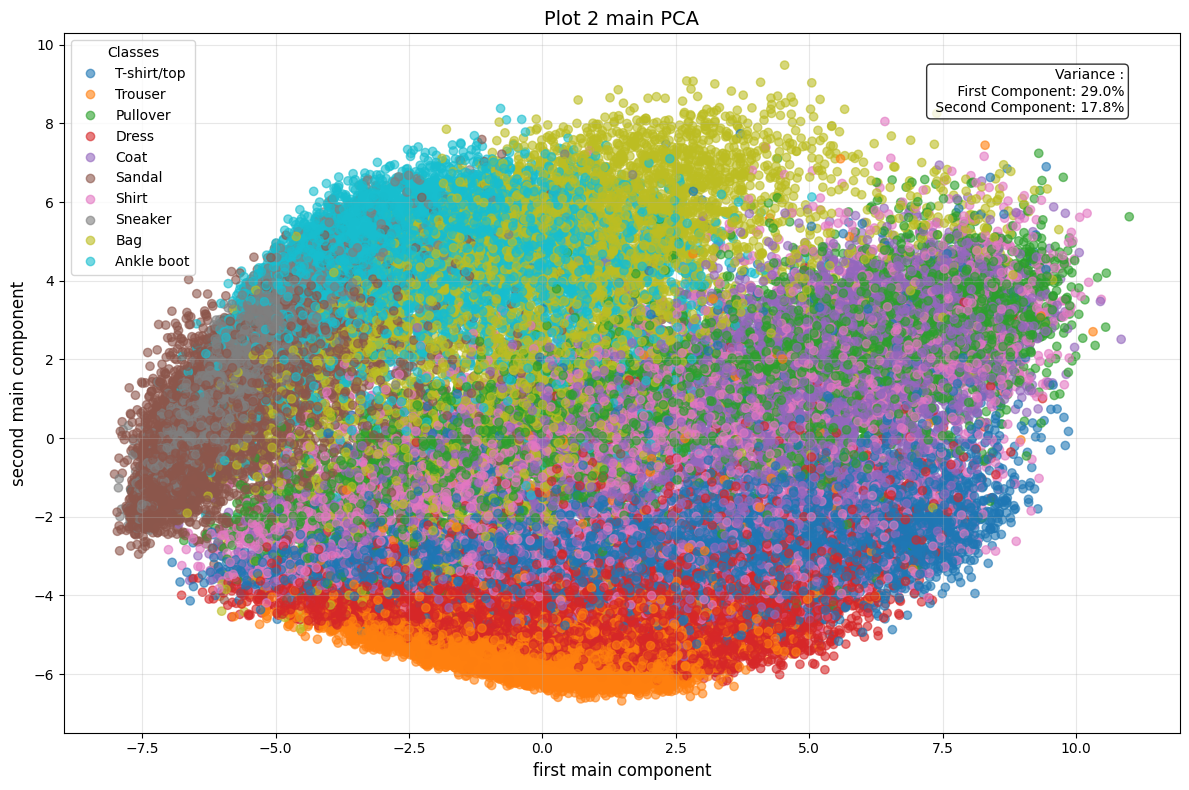

In [ ]:
(train_images, train_labels), (_, _) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255.0

# convert data to 2D
X = train_images.reshape(train_images.shape[0], -1)
y = train_labels

# choise 1 pic from each class
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2 main PCA component
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# plot scatter
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.6)

plt.xlabel('first main component', fontfamily='DejaVu Sans', fontsize=12)
plt.ylabel('second main component', fontfamily='DejaVu Sans', fontsize=12)
plt.title('Plot 2 main PCA', fontfamily='DejaVu Sans', fontsize=14)

legend = plt.legend(handles=scatter.legend_elements()[0],
                   labels=class_names,
                   title="Classes",
                   prop={'family': 'DejaVu Sans', 'size': 10})
plt.grid(True, alpha=0.3)

# each component percint variance
plt.text(0.95, 0.95,
         f'Variance :\n First Component: {pca.explained_variance_ratio_[0]*100:.1f}%\n Second Component: {pca.explained_variance_ratio_[1]*100:.1f}%',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
         fontfamily='DejaVu Sans')

plt.tight_layout()
plt.show()

# D (Reconstructing noisy images with PCA)

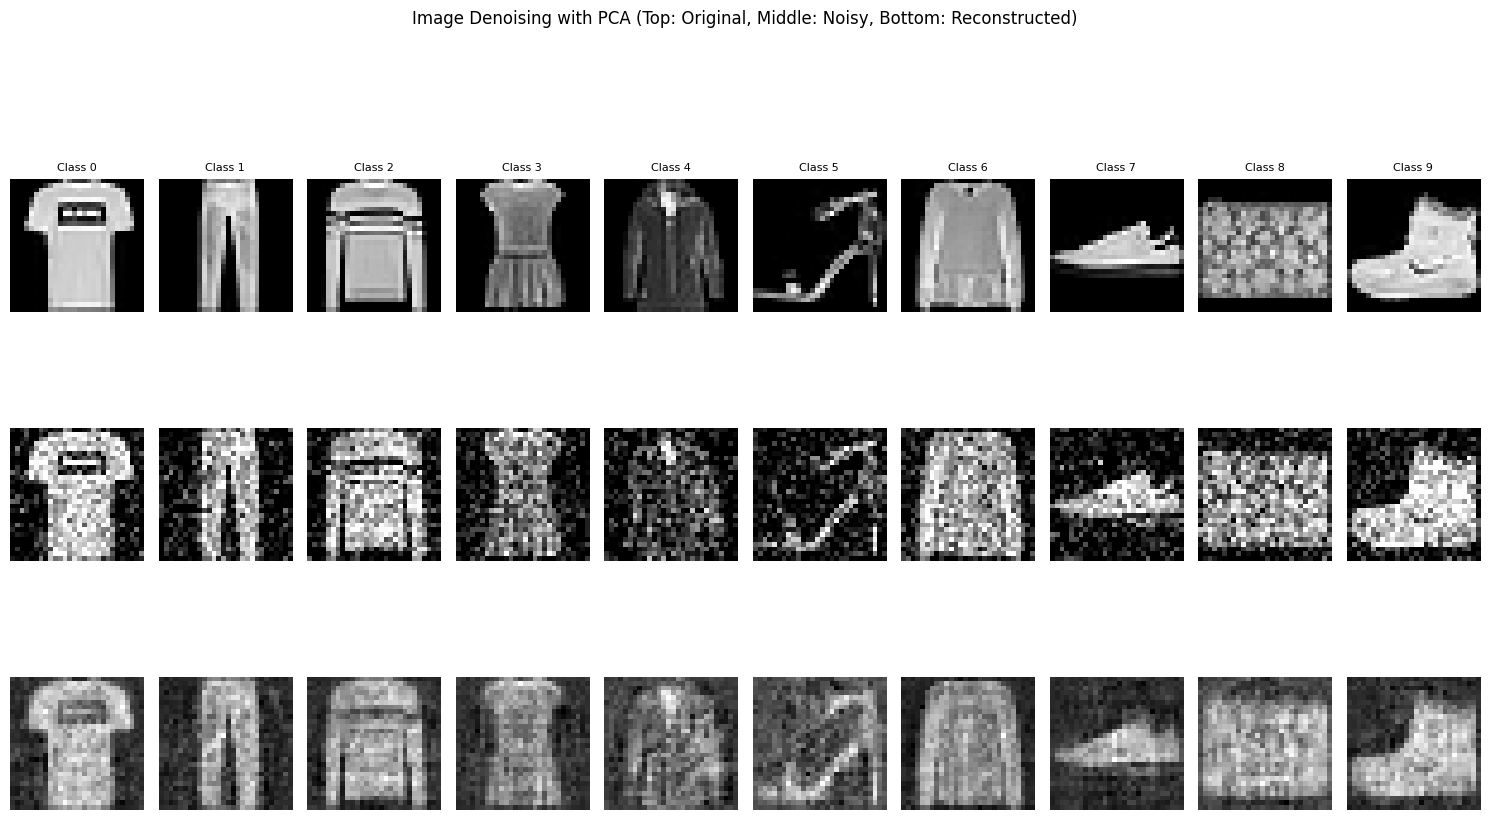

Mean Squared Error (MSE): 0.0224
Variance ratio with 100 components: 0.7651


In [ ]:
(train_images, train_labels), (_, _) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255.0

# Select 100 samples per class (1000 total) for proper PCA
selected_images = []
for class_id in range(10):
    class_indices = np.where(train_labels == class_id)[0][:100]  # Take 100 samples per class
    selected_images.extend(train_images[class_indices])
selected_images = np.array(selected_images)

# Add Gaussian noise
np.random.seed(42)
noisy_images = []
for img in selected_images:
    noise = np.random.normal(0, 0.2, img.shape)
    noisy_img = img + noise
    noisy_img = np.clip(noisy_img, 0, 1)
    noisy_images.append(noisy_img)
noisy_images = np.array(noisy_images)

# Flatten images
original_flat = selected_images.reshape(len(selected_images), -1)
noisy_flat = noisy_images.reshape(len(noisy_images), -1)

# Perform PCA with 100 components
n_components = 100
pca = PCA(n_components=n_components)
pca.fit(noisy_flat)
noisy_pca = pca.transform(noisy_flat)
reconstructed = pca.inverse_transform(noisy_pca)
reconstructed = reconstructed.reshape(-1, 28, 28)

# Select first sample from each class for display
display_indices = [i*100 for i in range(10)]  # First sample of each class

# Create the visualization
plt.figure(figsize=(15, 9))

for i, idx in enumerate(display_indices):
    # Original
    plt.subplot(3, 10, i+1)
    plt.imshow(selected_images[idx], cmap='gray')
    plt.title(f"Class {i}", fontsize=8)
    plt.axis('off')

    # Noisy
    plt.subplot(3, 10, i+11)
    plt.imshow(noisy_images[idx], cmap='gray')
    plt.axis('off')

    # Reconstructed
    plt.subplot(3, 10, i+21)
    plt.imshow(reconstructed[idx], cmap='gray')
    plt.axis('off')

plt.suptitle('Image Denoising with PCA (Top: Original, Middle: Noisy, Bottom: Reconstructed)', y=1.02, fontsize=12)
plt.tight_layout()
plt.show()

# Calculate metrics
mse = np.mean((noisy_images[display_indices] - reconstructed[display_indices]) ** 2)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Variance ratio with {n_components} components: {np.sum(pca.explained_variance_ratio_):.4f}")

# E (LDA with scikit-learn)

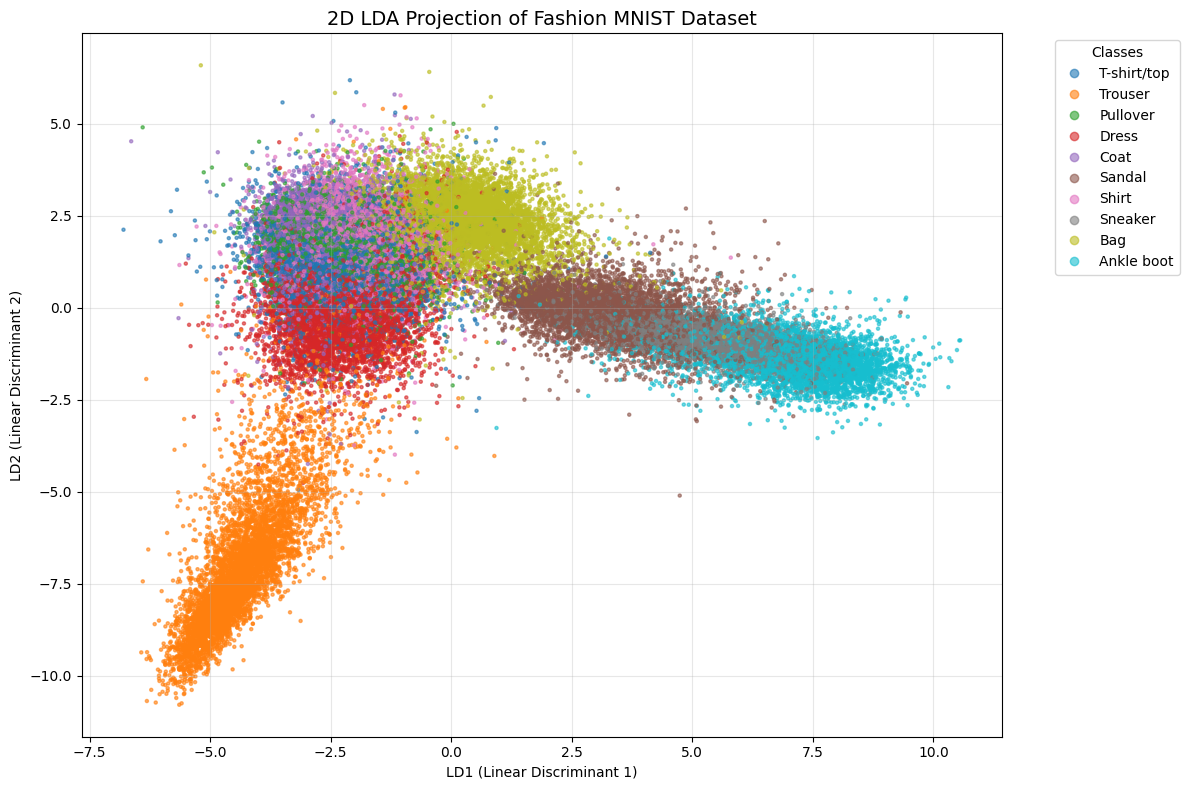

Explained variance ratio: [0.4456621  0.21978132]


In [ ]:
(train_images, train_labels), (_, _) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# convert data to 2D
X = train_images.reshape(train_images.shape[0], -1)
y = train_labels

# Applay LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Plot scatter
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='tab10', alpha=0.6, s=5)

plt.legend(handles=scatter.legend_elements()[0],
           labels=class_names,
           title="Classes",
           bbox_to_anchor=(1.05, 1),
           loc='upper left')

plt.title('2D LDA Projection of Fashion MNIST Dataset', fontsize=14)
plt.xlabel('LD1 (Linear Discriminant 1)')
plt.ylabel('LD2 (Linear Discriminant 2)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Explained variance ratio:", lda.explained_variance_ratio_)

# F (Scattering matrices)

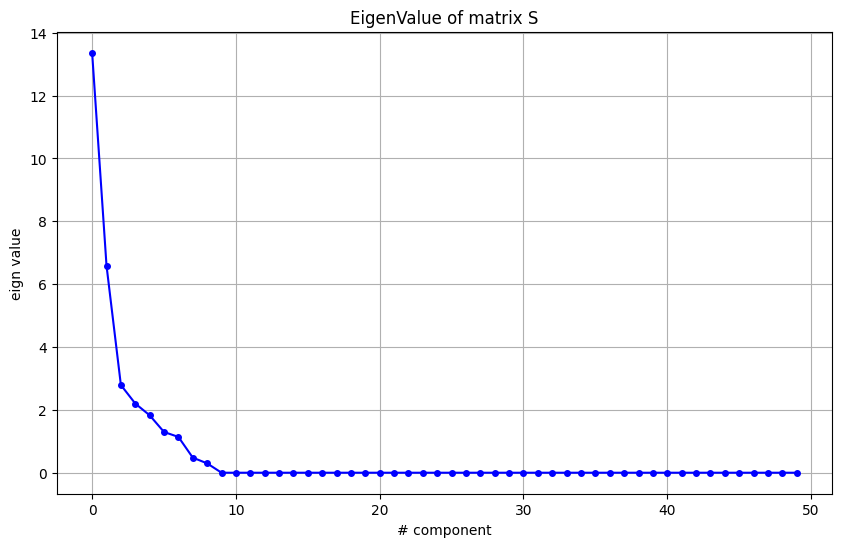

Number of non-zero eigenvalues: 396
10 first eigen values: [1.33642233e+01 6.59065155e+00 2.79012629e+00 2.20166433e+00
 1.82760810e+00 1.29629652e+00 1.13914133e+00 4.80414006e-01
 2.97199659e-01 3.27791522e-06]
sum of eign values: 29.99


In [ ]:
(train_images, train_labels), (_, _) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255.0

# convert data to 2D
X = train_images.reshape(train_images.shape[0], -1)  # (60000, 784)
y = train_labels

def compute_scatter_matrices(X, y):
    n_features = X.shape[1]
    classes = np.unique(y)
    n_classes = len(classes)

    mean_overall = np.mean(X, axis=0)

    # Sw
    Sw = np.zeros((n_features, n_features))
    for c in classes:
        X_c = X[y == c]
        mean_c = np.mean(X_c, axis=0)
        Sw += (X_c - mean_c).T @ (X_c - mean_c)

    # Sb
    Sb = np.zeros((n_features, n_features))
    for c in classes:
        X_c = X[y == c]
        mean_c = np.mean(X_c, axis=0)
        n_c = X_c.shape[0]
        Sb += n_c * (mean_c - mean_overall).reshape(-1, 1) @ (mean_c - mean_overall).reshape(1, -1)

    return Sw, Sb

# Calcs matrix
Sw, Sb = compute_scatter_matrices(X, y)

# Separable matrix (S = Sw^-1 * Sb)
try:
    S = np.linalg.inv(Sw) @ Sb
except np.linalg.LinAlgError:
    # use psudo inv if inv not exist
    S = np.linalg.pinv(Sw) @ Sb

# calc eign value
eigenvalues, _ = np.linalg.eig(S)
eigenvalues = np.real(eigenvalues)
eigenvalues_sorted = np.sort(eigenvalues)[::-1]  # sort

plt.figure(figsize=(10, 6))
plt.plot(eigenvalues_sorted[:50], 'b-', marker='o', markersize=4)  # first 50 values
plt.title('EigenValue of matrix S', fontfamily='DejaVu Sans')
plt.xlabel('# component', fontfamily='DejaVu Sans')
plt.ylabel('eign value', fontfamily='DejaVu Sans')
plt.grid(True)
plt.show()

print(f"Number of non-zero eigenvalues: {np.sum(eigenvalues_sorted > 1e-10)}")
print(f"10 first eigen values: {eigenvalues_sorted[:10]}")
print(f"sum of eign values: {np.sum(eigenvalues_sorted):.2f}")

# G (Trace)

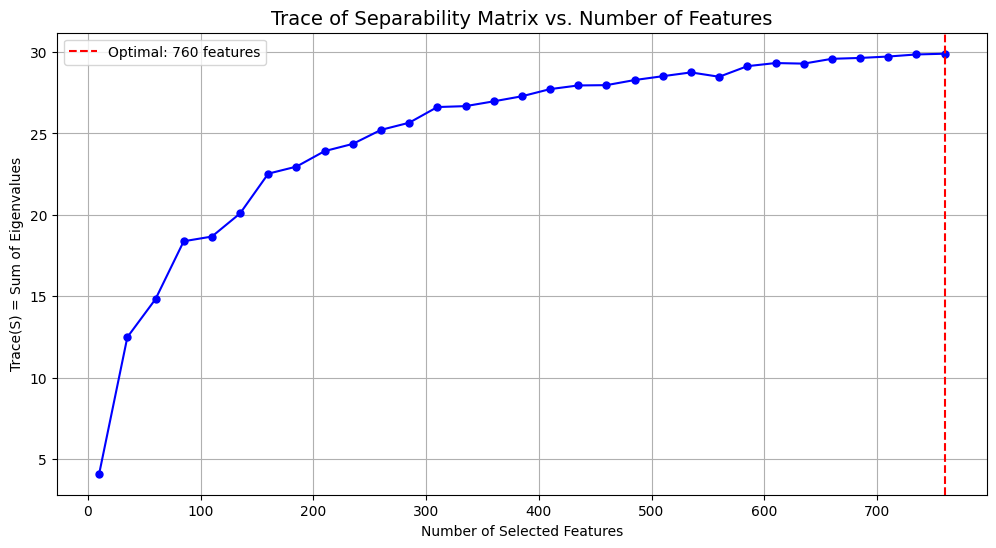

# Optimal feature: 760
Max trace value: 29.89


In [ ]:
(train_images, train_labels), (_, _) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255.0
X = train_images.reshape(train_images.shape[0], -1)  # (60000, 784)
y = train_labels

def compute_scatter_matrices(X, y):
    n_features = X.shape[1]
    classes = np.unique(y)
    mean_overall = np.mean(X, axis=0)

    Sw = np.zeros((n_features, n_features))
    Sb = np.zeros((n_features, n_features))

    for c in classes:
        X_c = X[y == c]
        mean_c = np.mean(X_c, axis=0)
        Sw += (X_c - mean_c).T @ (X_c - mean_c)
        n_c = X_c.shape[0]
        Sb += n_c * np.outer(mean_c - mean_overall, mean_c - mean_overall)

    return Sw, Sb

# Cala Trace
n_features_range = np.arange(10, 785, 25)
trace_values = []

for n in n_features_range:

    selected_features = np.random.choice(X.shape[1], size=n, replace=False)
    X_subset = X[:, selected_features]

    Sw, Sb = compute_scatter_matrices(X_subset, y)

    S = np.linalg.pinv(Sw) @ Sb
    trace_values.append(np.trace(S))

# optimal feature
optimal_idx = np.argmax(trace_values)
optimal_n_features = n_features_range[optimal_idx]

plt.figure(figsize=(12, 6))
plt.plot(n_features_range, trace_values, 'b-o', markersize=5)
plt.axvline(x=optimal_n_features, color='r', linestyle='--',
            label=f'Optimal: {optimal_n_features} features')
plt.title('Trace of Separability Matrix vs. Number of Features', fontsize=14)
plt.xlabel('Number of Selected Features')
plt.ylabel('Trace(S) = Sum of Eigenvalues')
plt.grid(True)
plt.legend()
plt.show()

print(f"# Optimal feature: {optimal_n_features}")
print(f"Max trace value: {trace_values[optimal_idx]:.2f}")

# 2.2 implement t-SNE

t-SNE is running... 
Iteration 0: KL divergence = 2.6493
Iteration 100: KL divergence = 0.7805
Iteration 200: KL divergence = 0.6835
Iteration 300: KL divergence = 0.6450
Iteration 400: KL divergence = 0.6234


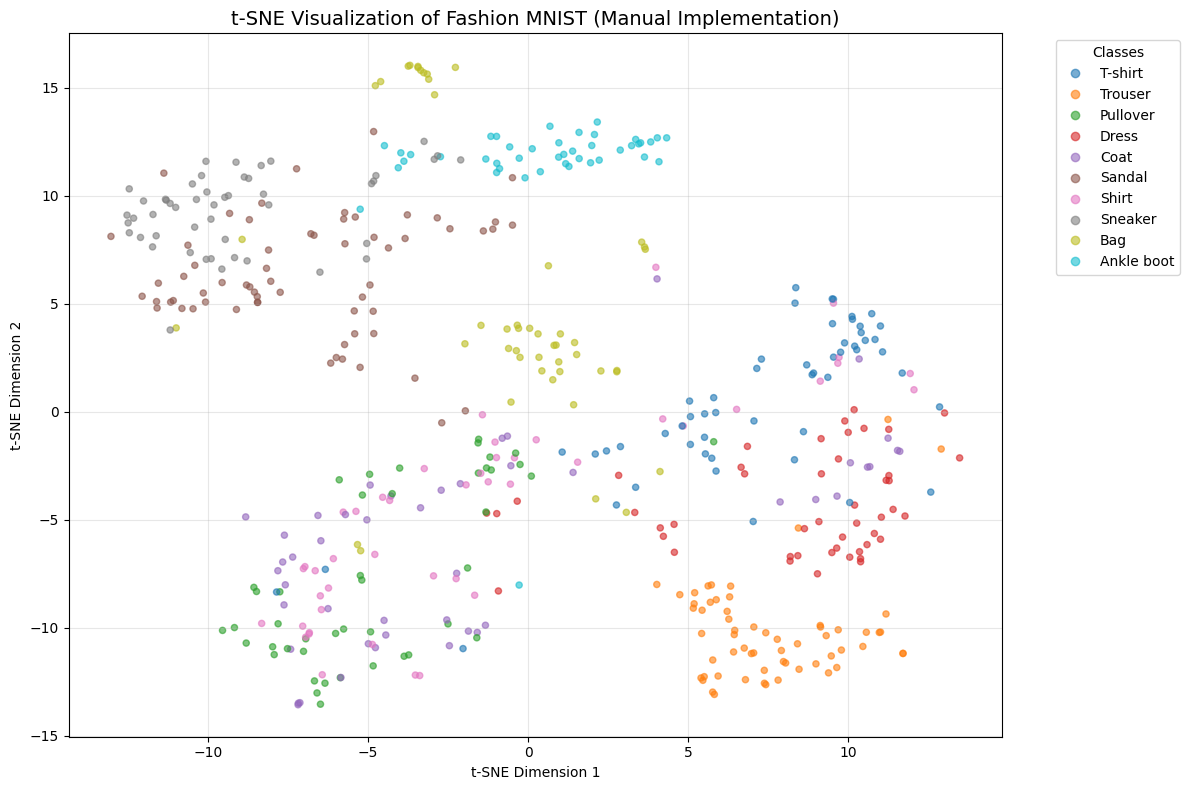

In [ ]:
(train_images, train_labels), (_, _) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255.0

# choise 500 sample for faster run
np.random.seed(6)
indices = np.random.choice(len(train_images), 500, replace=False)
X = train_images[indices].reshape(500, -1)
y = train_labels[indices]

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# High Dim Probabilities
def high_dim_probabilities(X, perplexity=30):
    distances = squareform(pdist(X, 'sqeuclidean'))
    n = X.shape[0]
    P = np.zeros((n, n))

    for i in range(n):
        beta_min = -np.inf
        beta_max = np.inf
        beta = 1.0

        for _ in range(50):
            # calc probility with current beta
            exp_dist = np.exp(-beta * distances[i])
            exp_dist[i] = 0
            sum_exp = np.sum(exp_dist)
            if sum_exp == 0:
                sum_exp = 1e-10
            P[i] = exp_dist / sum_exp

            # calc entropy
            entropy = -np.sum(P[i] * np.log2(P[i] + 1e-10))
            perplexity_diff = 2**entropy - perplexity

            if abs(perplexity_diff) < 1e-5:
                break

            if perplexity_diff > 0:
                beta_min = beta
                beta = beta * 2 if beta_max == np.inf else (beta + beta_max)/2
            else:
                beta_max = beta
                beta = beta / 2 if beta_min == -np.inf else (beta + beta_min)/2

    # make symtric
    P = (P + P.T) / (2 * n)
    P = np.maximum(P, 1e-12)

    return P

# Low Dim Probabilities
def low_dim_probabilities(Y):
    distances = squareform(pdist(Y, 'sqeuclidean'))
    inv_distances = 1 / (1 + distances)
    np.fill_diagonal(inv_distances, 0)
    Q = inv_distances / np.sum(inv_distances)
    Q = np.maximum(Q, 1e-12)
    return Q

# Calc Gradient with modified version
def compute_gradient(P, Q, Y):
    n = Y.shape[0]
    grad = np.zeros_like(Y)
    distances = squareform(pdist(Y, 'sqeuclidean'))

    for i in range(n):
        diff = Y[i] - Y
        grad[i] = 4 * np.sum(
            (P[i] - Q[i])[:, np.newaxis] * diff *
            (1 / (1 + distances[i]))[:, np.newaxis],
            axis=0
        )

    return grad

# implement t-SNE
def tsne(X, n_components=2, perplexity=30, n_iter=500, learning_rate=200):
    # initialization value
    Y = np.random.randn(X.shape[0], n_components) * 1e-4

    P = high_dim_probabilities(X, perplexity)

    # optimazing
    for iter in range(n_iter):
        Q = low_dim_probabilities(Y)
        grad = compute_gradient(P, Q, Y)

        # Updating
        Y = Y - learning_rate * grad

        # Normaliazing
        Y = Y - np.mean(Y, 0)

        if iter % 100 == 0:
            error = np.sum(P * np.log(P / Q))
            print(f"Iteration {iter}: KL divergence = {error:.4f}")

    return Y

# implement t-SNE
print("t-SNE is running... ")
Y = tsne(X, n_components=2, perplexity=30, n_iter=500)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap='tab10', alpha=0.6, s=20)

plt.legend(handles=scatter.legend_elements()[0],
           labels=class_names,
           title="Classes",
           bbox_to_anchor=(1.05, 1),
           loc='upper left')

plt.title('t-SNE Visualization of Fashion MNIST (Manual Implementation)', fontsize=14)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()